Number of correctly classified elements: 18284
correct divide all: 0.9142091420914208


<Axes: >

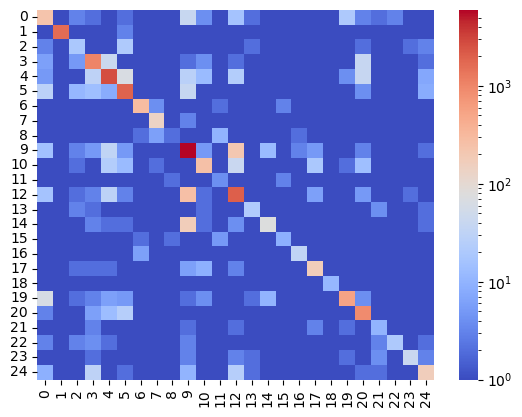

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 24 10:50:30 2024

@author: camer
"""

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
from sklearn.preprocessing import StandardScaler

sample = pd.read_csv("sample2.csv")
test_size = 0.2
column_names = [
    "dataset", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", "IoTIP", "IoTIP_int",
    "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", "PacketCount", "BytesCount", "reversePacketCount",
    "reverseBytesCount", "SmallPktCount", "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT",
    "FirstNonEmptyPktSize", "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount",
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT",
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT",
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", "NTP", "TCP_others",
    "UDP_others", "year_month"
]
sample.columns = column_names
sample.head()
sample_size = len(sample["dataset"])
 
heads = sample.drop(columns = ['dataset', 'start_date', 'start_time', 'IoTMac', 'IoTIP', 'IoTIP_int', 'year_month','hostMac'])
data = pd.get_dummies(heads)
classes = sample['IoTMac']
 
X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=test_size, random_state=42)
del data
import gc
gc.collect()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# knn_regressor = KNeighborsRegressor(n_neighbors=5)
# knn_regressor.fit(X_train, y_train)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
# y_pred = knn_regressor.predict(X_test)
y_pred = knn_classifier.predict(X_test)
 
labels = sorted(set(y_train) | set(y_test))
 
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
 
 
correct_classifications = cm.diagonal().sum()
print("Number of correctly classified elements:", correct_classifications)
print("correct divide all:", correct_classifications/(sample_size * test_size))
 
 
 
# Display the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
cmatrix = confusion_matrix(y_test, y_pred)
for f in cmatrix:
    f += 1



import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm())